# [pandas](https://pandas.pydata.org/docs/reference/index.html)

## Table of Contents
- [Introduction](#introduction)
- [Overview](#overview)
- [Series](#series)
    - [Basic Properties](#basic-properites)
    - [Series Methods](#series-methods)
    - [Example: Looking at Exoplanet Inclination Distributions](#example-looking-at-exoplanet-inclination-distributions)
- [DataFrames](#dataframes)
    - [Basic Properties](#basic-properties)
    - [Navigating DataFrames Using .loc and .iloc](#navigating-dataframes-using-.loc-and-.iloc)
    - [Importing and Exporting Data](#importing-and-exporting-data)
- [Exercises]()
    - [Problem 1: The Basics](#problem-1---the-basics)
    - [Problem 2: Plotting](#problem-2---plotting)
    - [Problem 3: Searching for Habitability](#problem-3---searching-for-habitability)

## Introduction <a name="introduction"></a>

The way we control, manipulate, and analyze data is an important process across all scientific disciplines. Exoplanet research is no different. The astronomical community has generally rallied behind **Python** (if you couldn't already tell from our use of Jupyter notebooks!) as the primary language for developing new data structures, computational methods, and robust analytical packages. These are amazing tools, but using them efficiently requries a solid foundation. This lesson gives a brief overview of the important capabilities behind `Pandas`, some interactive activities to visualize data, and how they are used in Exoplanet research.

 <div class="alert alert-block alert-warning">

**IMPORTANT**: If you have limited exposure or practice with Python as a language, it is encouraged to get an understanding of basic syntax and proper use of variables. [Here](https://programming-23.mooc.fi/) is a self-paced, free course offered by the University of Helsinki that covers most of the important concepts in the first few modules.

## Overview

`pandas` is a Python suite for data manipulation and analysis, with the primary data structures being `Series` and `DataFrames`. Both `Series` and `DataFrames` are similar to 1D and 2D `Numpy` arrays, respectively, but support a broader range of functionality at the cost of more complex syntax. By the end of this lesson, you should be able to:
- **Create, manipulate, and analyze data using `DataFrames` and `Series`**
- **Use `pandas` to import and export various types of data**
- **Visualize and interpret different types of data using `pandas` methods**

[Here](https://pandas.pydata.org/docs/user_guide/index.html) is the official documentation for `pandas`!

To start, we generally import both `Numpy` and `pandas` simultanously.

In [3]:
import numpy as np
import pandas as pd

## Series
[Here](https://pandas.pydata.org/docs/reference/series.html) is the official documentation for `Series`.
### Basic Properties
`Series` are 1D data structures which are very similar to 1D `Numpy` arrays, with a few key differences. `Series`:
- Can store mixed data types
- Are size immutable (fixed size when created), value mutable (elements can change)
- Are indexed, and custom indexes can be passed
- Can do operations between different `Series`, which do **not** need to be the same size
We can explore basic properties in the code below.

 <div class="alert alert-block alert-info">
 
**INFO**: There will be a lot of code output. If you want to keep your notebook tidy, click on the output box and click the 'O' (the letter, not '0') key to collapse the output box down without clearing your accumulated variables. 

In [4]:

#Construct the Series by calling the function and bulding a list inside
data = pd.Series([0, 0.1, 0.4, 0.7, 10, 100, 'Test'])
print(data, '\n')
#Note the two columns when printed: the first is the index column, the second is our series. 
#See how we can have ints, floats, and strings!

#Can be indexed and sliced
print(data[5], '\n', data[4:], '\n')

#Can customize the indices and call that index to get the corresponding values
#Similar to the key:value structure of Python dictionaries. This does *not* overwrite 
#the default indexing (e.g. 0, 1, 2, 3) *unless* you use integers in your custom index.
indexed_data = pd.Series([15, 'Exo', 'Planets', 100], index=['a', 'b', 'c', 'd'])
if indexed_data[0] == indexed_data['a']:
    print('Identical index', '\n')
else:
    print('Not identical')

#You can also construct Series with custom indices by passing a dictionary.
#Note: If you set a custom index in the pd.Series function, it will *overwrite* the dictionary keys.
example_dict = dict({'a': 1, 'b':2, 'c':100})
ser = pd.Series(data = example_dict)
print(ser['a'], ser['b'], ser[2], '\n')

#Can't use normal indexing if passed index contains an integer UNLESS you use the .iloc function
indexed_data2 = pd.Series([15, 'Exo', 'Planets', 100], index=[1, 'b', 'c', 'd'])
try:
    if indexed_data2[0] == indexed_data2[1]:
        print('Identical Index')
    else:
        print('Not identical')
except KeyError:
    print('Cannot use default index if integers are assigned as a custom index!')

#If you want to change the index of a Series, use Series.reindex
#You can also reset the index to the default by using Series.reset_index
indexed_data.reindex(index=['a', 'b', 'c', 'd'])
print(indexed_data, '\n')
reset_data = indexed_data.reset_index(drop = True)
print(reset_data)


0       0
1     0.1
2     0.4
3     0.7
4      10
5     100
6    Test
dtype: object 

100 
 4      10
5     100
6    Test
dtype: object 

Identical index 

1 2 100 

Cannot use default index if integers are assigned as a custom index!
a         15
b        Exo
c    Planets
d        100
dtype: object 

0         15
1        Exo
2    Planets
3        100
dtype: object


### Series Methods
Now that we see how `Series` stack up to Python lists, dicts, and `Numpy` arrays for their basic syntax, we will highlight some methods available to `Series`. [This page](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series) contains all available methods for `Series`, some of which will be highlighted below.

 <div class="alert alert-block alert-info">

**INFO**: There will be a lot of code output. If you want to keep your notebook tidy, click on the output box and click the 'O' (the letter, not '0') key to collapse the output box down without clearing your accumulated variables. 

In [5]:
example = pd.Series([-10, 4, -0.44444, 18])
example2 = pd.Series([12, 14, 200, 3, -12, 72, np.nan])
example3 = pd.Series([2, 4, 6, 8])
#Returns the absolute value of each element. Only works for ints, floats. Type error for strings, bools
#NOTE: These methods do not alter the series, only if reassigned
print(example.abs(), '\n')

#Addition of two, different dimensional series.
#Note how the resulting series is the same shape as the largest series passed in the operation. 
#When performing operations on unequally sized series, the elements past the length of the smallest
#series are treated as NANs. 
example4 = example.add(example2)
example5 = example.sub(example3)
print(example4, '\n\n', example5, '\n')

0    10.00000
1     4.00000
2     0.44444
3    18.00000
dtype: float64 

0      2.00000
1     18.00000
2    199.55556
3     21.00000
4          NaN
5          NaN
6          NaN
dtype: float64 

 0   -12.00000
1     0.00000
2    -6.44444
3    10.00000
dtype: float64 



In [6]:
#Can combine operatrions using Series.agg
print(example2.agg(['min', 'max', 'mean', 'product']), '\n')

#Clip values to a floor/ceiling if they are below or above that threshold
print(example2.clip(lower = 0, upper = 10), '\n')

#Compare values of two series and highlight differences
print(example.compare(example3), '\n')

#Generate descriptive statistics with Series.describe. 
print(example3.describe(), '\n')

min       -1.200000e+01
max        2.000000e+02
mean       4.816667e+01
product   -8.709120e+07
dtype: float64 

0    10.0
1    10.0
2    10.0
3     3.0
4     0.0
5    10.0
6     NaN
dtype: float64 

       self  other
0 -10.00000    2.0
2  -0.44444    6.0
3  18.00000    8.0 

count    4.000000
mean     5.000000
std      2.581989
min      2.000000
25%      3.500000
50%      5.000000
75%      6.500000
max      8.000000
dtype: float64 



In [7]:
#Comparisons between series, element wise. Greater than or equal to and less than or equal to, respectively
print(example.ge(example3), example.le(example3), '\n')

#Remove NANs entirely
example2.dropna()

#Masking methods. 
#Series.mask replaces any element that meets the condition with the corresponding value.
print(example2.mask(np.isnan(example2) == True, 0), example2.notnull(), '\n')

#Can send contents of a Series to a list
listed_data = example2.tolist()
print(listed_data, '\n')

#Find the index(s) of a particular element(s)
print(example2[example2 == 200].index[0], '\n')

0    False
1     True
2    False
3     True
dtype: bool 0     True
1     True
2     True
3    False
dtype: bool 

0     12.0
1     14.0
2    200.0
3      3.0
4    -12.0
5     72.0
6      0.0
dtype: float64 0     True
1     True
2     True
3     True
4     True
5     True
6    False
dtype: bool 

[12.0, 14.0, 200.0, 3.0, -12.0, 72.0, nan] 

2 



Let's look at an example to help demonstrate these methods to a specific problem.

### Example: Looking at Exoplanet Inclination Distributions
The inclination in exoplanet systems is the angle of the orbit relative to our line of sight. An inclination of $i = 0\degree$ means the orbit creates a 'ring' around the host; these systems can **never** transit with respect to Earth. Conversely, an inclination $i = 90\degree$ is a perfect 'head-on' orbit. These planets **always** transit. The figure below gives a helpful visual:

![Inclination.png](../../Auxiliary_Files/Graphics/Data_Structures/Inclination.png)

We can use `Series` to investigate the distribution of known exoplanets, and see if any trends emerge.

**INFO**: We use functions from `astroquery` to gather the data. This package is covered in the [astroquery]() lesson. This is not required to proceed.

count    4301.000000
mean       86.871015
std        10.523024
min         0.370000
25%        86.900000
50%        88.770000
75%        89.670000
max       176.092000
dtype: float64


Text(0.5, 1.0, 'Inclination Distributions')

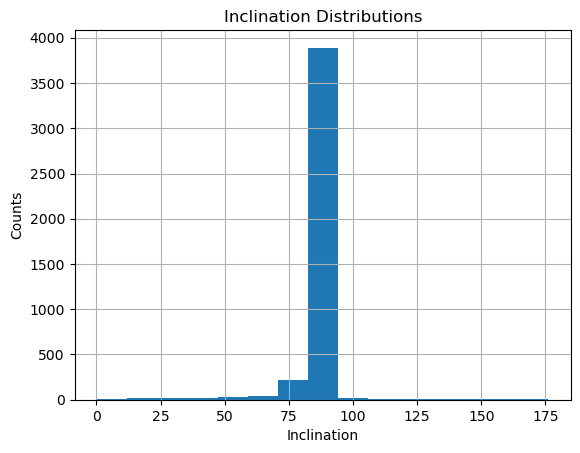

In [8]:
from astroquery.ipac.nexsci.nasa_exoplanet_archive import NasaExoplanetArchive
from matplotlib import pyplot as plt
##Importing the data straight from the NASA Exoplanet, forcing the values to be floats
inclinations = pd.Series(NasaExoplanetArchive.query_criteria(table='pscomppars', select = 'pl_orbincl')['pl_orbincl'], dtype=float)

##Drop any nans
inclinations = inclinations.dropna()

##Lets get some descriptive statistics
print(inclinations.describe())

##And let's plot the results. Pandas uses pyplot for the integrated plotting of series and dataframes
inclinations.hist(bins = 15)
plt.xlabel('Inclination')
plt.ylabel('Counts')
plt.title('Inclination Distributions')


What about the population of known exoplanets might cause this distribution of inclinations? This is an excellent example of **sampling bias**. We will explore more exoplanet statistics in other examples, as well as informative [exercises]().

## DataFrames

`Series` are simple containers with useful methods for 1D data, but are in many ways are redundant with `Numpy` arrays. `DataFrames` are the flagship data structure for `pandas`, and have by far the most useful methods for tabular data. In many ways, `DataFrames` mirror Excel spreadsheets, and can be visualized with columns (with headers) and rows (with indices). `pandas` gives seamless methods to parse, select, analyze, and manipulate tabular data, which is invaluable when working with data in e.g. `.csv` files. We will outline basic properites of `DataFrames`, as well as the most important methods in order to navigate any tabular data you might encounter while researching.

### Basic Properties
Forming `DataFrames` can be done in a variety of different ways, as demonstrated below:

In [9]:
#Form it in-line, using 'column': [data]
data_line = pd.DataFrame({'Planet Name': ['EC1 b', 'EC1 c', 'EC2 b', 'EC2 c', 'EC2 c'], 'Radius': [1, 1.2, 0.5, 4, 2]})
print(data_line, '\n')

#From individual lists
names = ['EC1 b', 'EC1 c', 'EC2 b', 'EC2 c', 'EC2 c']
radius = [1, 1.2, 0.5, 4, 2]
data_list = pd.DataFrame({'Planet Name': names, 'Radius': radius})

#From a dictionary and a Series
d = {'Planet Name': ['EC1 b', 'EC1 c', 'EC2 b', 'EC2 c', 'EC2 c'], 'Radius': pd.Series([1, 1.2, 0.5, 4, 2], index=[0, 1, 2, 3, 4])}
data_dict = pd.DataFrame(data=d, index=[0, 1, 2, 3, 4])

#See if the three methods yield the same DataFrame
if data_line.equals(data_list) == True and data_line.equals(data_dict) == True and data_list.equals(data_dict) == True:
    print('All DataFrames are equal', '\n')

#From an Numpy array
data_array = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
                   columns=['a', 'b', 'c'])
print(data_array)

  Planet Name  Radius
0       EC1 b     1.0
1       EC1 c     1.2
2       EC2 b     0.5
3       EC2 c     4.0
4       EC2 c     2.0 

All DataFrames are equal 

   a  b  c
0  1  2  3
1  4  5  6
2  7  8  9


`DataFrames` make it easy to isolate particular rows (using indices) and columns (using column names). Examples are shown below.

                       pl_radj    pl_orbper
pl_name                                    
OGLE-2016-BLG-1227L b    1.240          NaN
Kepler-276 c             0.259    31.884000
Kepler-829 b             0.188     6.883376
K2-283 b                 0.314     1.921036
Kepler-477 b             0.185    11.119907
...                        ...          ...
OGLE-2019-BLG-1180L b    1.200          NaN
TOI-1107 b               1.300     4.078239
KMT-2023-BLG-1642L b     1.230          NaN
HD 73267 b               1.160  1257.991590
OGLE-2017-BLG-1237L b    1.160          NaN

[5632 rows x 2 columns]
                            pl_radj   pl_orbper  pl_orbincl
pl_name                                                    
nu Oph c                       1.07  3180.60000      90.000
75 Cet b                       1.18   696.62000         NaN
gam Lib b                      1.22   414.88000         NaN
HD 113337 c                    1.08  5429.93477      57.478
HD 11755 b                     1.14   433.7

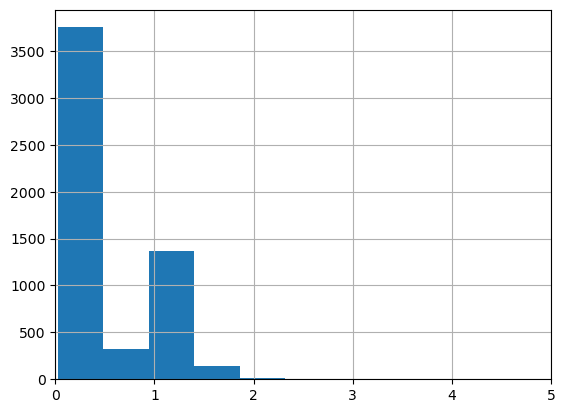

In [68]:
from astroquery.ipac.nexsci.nasa_exoplanet_archive import NasaExoplanetArchive
from matplotlib import pyplot as plt

##Importing the data straight from the NASA Exoplanet Archive
##Note: Astoquery has its own method to take a query table and convert to a DataFrame!
exo_data = NasaExoplanetArchive.query_criteria(table='pscomppars', select = {'pl_name', 'pl_orbincl', 'pl_radj', 'pl_orbper'}).to_pandas()
exo_data_copy = exo_data
#We can make the exoplanet name the index for each row
exo_data.set_index('pl_name', inplace=True)

#Let's only look at the distribution of exoplanet radii
radii = exo_data['pl_radj']
plt.xlim(0, 5)
radii.hist(bins = 15)

#What about only the planet radius and orbital period?
name_period = exo_data[['pl_radj', 'pl_orbper']]
print(name_period)

#What about planets with an orbit greater than 1 Earth year?
long_orbit = exo_data[exo_data['pl_orbper'] > 365]
print(long_orbit)


This gives us good flexibility on isolating specific columns of data, which is extremely useful when the datasets you are working with are high dimensional. What about rows? Can we filter results of the returned rows to match specific criteria? We can do these through the `.loc` and `.iloc` methods, which we will discuss in the next section.

## Navigating DataFrames Using .loc and .iloc
Documentation for .loc can be found [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html), and for .iloc [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html).

The `.loc` (short for 'location') method allows you to isolate particular rows and columns through the index of the `DataFrame` through index **labels**. The `.iloc` (short for 'index location') method is similar, but isolates rows and columns through **integer** index, similar to slicing arrays or lists. Both `.loc` support conditional expressions, which can isolate particular rows and columns that match the conditions. We explore this in the code below.

In [71]:
#We can use the DataFrame imported from the last block of code above
#What if we want to isolate the parameters for Proxima Centauri b?
#We can think of .loc as indexing by row

prox = exo_data.loc['Proxima Cen b']
print(prox)

#What if we specifically want the radius of WASP-121 b?
WASP121 = exo_data.loc['WASP-121 b', 'pl_radj']
print('WASP121 b is: ' + str(WASP121) + ' Jupiter radii')

#What about the subset of planets with a radius less than 0.1 Jupiter radii?
small_rad = exo_data.loc[exo_data['pl_radj'] < 0.1]
print(small_rad)

#Subset of planets with radius greater than 1 Jupiter radii and orbital period less than 20 days?
#Note the syntax for two conditions. Each condition is partitioned by parentheses and joined by an ampersand
hot_jupiters = exo_data.loc[(exo_data['pl_radj'] > 1) & (exo_data['pl_orbper'] < 20)]
print(hot_jupiters)

pl_radj        0.0920
pl_orbper     11.1868
pl_orbincl        NaN
Name: Proxima Cen b, dtype: float64
WASP121 b is: 1.753 Jupiter radii
                    pl_radj  pl_orbper  pl_orbincl
pl_name                                           
Teegarden's Star c    0.091  11.416000         NaN
LHS 1678 d            0.088   4.965223       88.31
LHS 1678 b            0.061   0.860232       88.53
Kepler-910 b          0.073   2.364369       88.44
Kepler-107 d          0.077   7.958390       87.55
...                     ...        ...         ...
Kepler-1998 b         0.062   3.032671       88.93
Kepler-1994 b         0.056   4.612250       89.95
Kepler-1992 b         0.092  15.611224       89.03
Kepler-1869 c         0.074   1.716828       81.38
Kepler-290 d          0.079   0.764018       84.79

[333 rows x 3 columns]
              pl_radj  pl_orbper  pl_orbincl
pl_name                                     
HD 149143 b     1.220   4.071820         NaN
Kepler-435 b    1.990   8.600154      85.5

These examples give an idea of what level of refinement we can achieve with `.loc`, and these examples are not exhaustive. Now we can look at the `.iloc` method to retrieve data by integer indexing, like slicing a list or array.

In [72]:
#Reset the index to integers. This re-inserts the planet names back into the DataFrame as a column
#Only run this once!
exo_data.reset_index(inplace = True)

#If rerun, will keep adding empty index columns to your DataFrame
#Rerun the last **two** blocks of code if this happens

In [73]:
#First sort the DataFrame by ascending planetary orbital period
exo_data.sort_values(by = ['pl_orbper'], inplace = True)

#Eliminate any data with NaN as a period entry
exo_data = exo_data.loc[np.isnan(exo_data['pl_orbper']) == False]

#What are the parameters for the planet with the shortest period?
print(exo_data.iloc[0])

#Which planet has the 2nd shortest orbital period? Remember, Python starts indexing at 0
#In this example, the first index is the row, and the second index is the column.
#Planet name is the third column, while period is the fifth
print('The planet with the 2nd shortest orbital period is: ' + str(exo_data.iloc[1, 0]) + ' with a period of ' + str(exo_data.iloc[1, 2]) + ' days')

#Just like arrays, we can find the longest period by using '-1' as the index
print('The planet with the longest orbital period is: ' + str(exo_data.iloc[-1, 0]) + ' with a period of ' + str(exo_data.iloc[-1, 2]) + ' days')

pl_name       PSR J1719-1438 b
pl_radj                    NaN
pl_orbper             0.090706
pl_orbincl                 NaN
Name: 4985, dtype: object
The planet with the 2nd shortest orbital period is: M62H b with a period of 0.13293503 days
The planet with the longest orbital period is: COCONUTS-2 b with a period of 402000000.0 days


`.iloc` is particularly well suited for data where order is important, such as a list of chronological events. Both `.loc` and `.iloc` are suited for different types of data.

### Importing and Exporting Data
Importing data from .csv files to `DataFrames` and exporting `DataFrames` to .csv files is one of the most common uses for the `pandas` library. The methods to do this are straightforward, but powerful. This brief section will demonstrate how to import data from a .csv file to a `DataFrame`, modfiy it, and export it as a new .csv file.

There are many useful optional arguments for both [`to_csv`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html) and [`read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) methods, which we will not cover in-depth here.

In [74]:
#We can export our previous DataFrame and export it to a .csv using df.to_csv()
#Index = None makes it so the numeric index does not become its own column
exo_data.to_csv('Exoplanet_Data.csv', index = False)

#We can read back the data. Here, we only read the first 5 rows, and choosing the planet name as index again
import_data = pd.read_csv('Exoplanet_Data.csv', nrows = 5, index_col = 'pl_name')
print(import_data)


                  pl_radj  pl_orbper  pl_orbincl
pl_name                                         
PSR J1719-1438 b      NaN   0.090706         NaN
M62H b                NaN   0.132935         NaN
K2-137 b            0.057   0.179719        93.1
KIC 10001893 b        NaN   0.219700         NaN
KOI-55 b            0.068   0.240104        65.0


## Exercises

To solidify your understanding of `pandas`, here are some exercises.

### Problem 1 - The Basics
Import the data from 'Exoplanet_Data.csv' into a `DataFrame`. Use it to identify:
- The planet with the largest radius
- The subset of planets that have an orbital period greater than Pluto's
- The subset of planets with an orbital period less than 20 days, but with a radius smaller than 0.1 Jupiter radii
- The planet with the largest inclination

In [ ]:
# Codespace for Exercise 1

### Problem 2 - Plotting
Using the data from 'Exoplanet_Data.csv', generate the following figures:
- A histogram of known planetary radii
- A plot of orbital period vs radii
- A plot of inclination vs orbital period
Comment on any trends you see.

In [ ]:
# Codespace for Exercise 2

### Problem 3 - Searching for Habitability
Import the data from 'Exoplanet_Parameters.csv'. Note how much data there is! Use the [column definitions](https://exoplanetarchive.ipac.caltech.edu/docs/API_PS_columns.html) from the NASA Exoplanet Archive documentation to ground yourself on which column is what parameter. Complete the following:
- Filter to planets which have an overall radius uncertainty of less than 10%. That is, the sum of both error bounds is less than 10% of the corresponding radius value.
- Out of those planets, find which planets are within 20% of the Earth's radius
- Out of those planets, filter to those with host stars with a temperature between 4000-6000 Kelvin
- Out of those planets, filter to those whose eccentricity is at or below 0.10
- Out of those planets, filter to those whose planetary period is within 40 days of Earth's period
- What fraction of known planets are 'habitable' from this criteria?
Visualize your results any way you'd like. Is Earth rare?

In [ ]:
# Codespace for Exercise 3